In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
# modify "customized_path_to_homework", path of folder in drive, where you uploaded your homework
customized_path_to_homework = '/content/drive/My Drive/axcell/'
sys.path.append(customized_path_to_homework)

In [3]:
!pwd

/content


In [4]:
import pandas as pd


def read_arxiv_papers(path):
    return pd.read_csv(path)


def read_tables_annotations(path):
    return pd.read_json(path)

In [8]:
ARXIV_PAPERS_URL = '/content/drive/My Drive/axcell/arxiv/arxiv-papers.csv.xz'
SEGMENTED_TABLES_URL = '/content/drive/My Drive/axcell/segmented-tables.json.xz'
PWC_LEADERBOARDS_URL = '/content/drive/My Drive/axcell/pwc-leaderboards.json.xz'

In [9]:
arxiv_papers = read_arxiv_papers(ARXIV_PAPERS_URL)

print(f'Number of papers:           {len(arxiv_papers):8}')
print(f'└── with LaTeX source:      {(~arxiv_papers.status.isin(["no-tex", "withdrawn"])).sum():8}')
print(f'Number of extracted tables: {arxiv_papers.tables.sum():8}')

FileNotFoundError: ignored

In [ ]:
import matplotlib.pyplot as plt
df = arxiv_papers['status'].value_counts().rename_axis('status_class').reset_index(name='counts')
df

,status_class,counts
0,success,89785
1,no-tex,10312
2,processing-error,4026
3,withdrawn,587


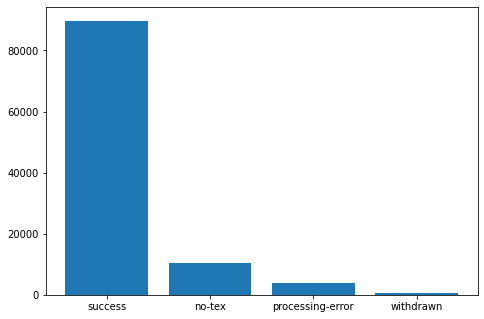

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df.status_class, df.counts)
plt.show()

In [ ]:
arxiv_papers.sections.max()

174

In [ ]:
ranges = [0,20,40,60,80,100,120,140,160,180,200]
a = arxiv_papers.groupby(pd.cut(arxiv_papers.sections, ranges)).count()
a.sections

sections
(0, 20]       70516
(20, 40]      18593
(40, 60]        578
(60, 80]         37
(80, 100]         8
(100, 120]        3
(120, 140]        3
(140, 160]        1
(160, 180]        2
(180, 200]        0
Name: sections, dtype: int64

In [ ]:
ranges = [0,10,20,30,40,50,60,70,80,90,1015]
a = arxiv_papers.groupby(pd.cut(arxiv_papers.tables, ranges)).count()
a.tables

tables
(0, 10]       65333
(10, 20]       2492
(20, 30]        264
(30, 40]         64
(40, 50]         31
(50, 60]         15
(60, 70]          5
(70, 80]          9
(80, 90]          2
(90, 1015]       16
Name: tables, dtype: int64

In [ ]:
arxiv_papers

,arxiv_id,archive_size,sha256,title,sections,tables,status
0,0704.0004v1,9486,83b5c83d0963d796ed61fae5ed47cac55d2c942d41e03f...,A determinant of Stirling cycle numbers counts...,1,0,success
1,0704.0010v1,45695,6dd40a2af3e336e0a8e94a5a20a1075819af829f1fcef7...,"Partial cubes: structures, characterizations, ...",0,0,no-tex
2,0704.0012v1,9560,7f7997eee4e571f22551c06bf25e2315ac27fc663273c1...,Distribution of integral Fourier Coefficients ...,7,0,success
3,0704.0858v1,355195,723ba50cc7a5d0d2454df543d6aaacd5948a1bb4690459...,Lessons Learned from the deployment of a high-...,0,0,no-tex
4,0704.0861v1,693752,05f2ae4019a2740a8ef53074656ea9de50324150042fd9...,Empirical analysis and statistical modeling of...,0,0,no-tex
...,...,...,...,...,...,...,...
104705,2002.08204v1,346382,f8908756ae6fd29e8df962048b6b8efca4a040f8df16b0...,SYMOG: learning symmetric mixture of Gaussian ...,0,0,no-tex
104706,2002.08253v1,89874,467cad121914a28dfb485dcdad079d73ca8b89add2ae53...,Distance-Based Regularisation of Deep Networks...,0,0,processing-error
104707,2002.08264v1,293953,89ce55f66b8888cdeeca7083a7eb8e9cab48b21c38d7f8...,Molecule Attention Transformer,18,20,success
104708,2002.08301v1,2000723,63389dbd67c1078133db730e6e5941b431c58c9ad7f1a8...,Multi-wavelet residual dense convolutional neu...,17,3,success


In [ ]:
segmented_tables_annotations = read_tables_annotations(SEGMENTED_TABLES_URL)

leaderboards = (segmented_tables_annotations.tables.apply(
    lambda tables: len([t for t in tables if t['leaderboard']])
).sum())
ablations = (segmented_tables_annotations.tables.apply(
    lambda tables: len([t for t in tables if t['ablation']])
).sum())
records = (segmented_tables_annotations.tables.apply(
    lambda tables: sum([len(t['records']) for t in tables])
).sum())

print(f'Number of papers: {len(segmented_tables_annotations):8}')
print(f'Number of tables: {segmented_tables_annotations.tables.apply(len).sum():8}')
print(f'├── leaderboards: {leaderboards:8}')
print(f'└── ablations:    {ablations:8}')
print(f'Linked results:   {records:8}')

Number of papers:      352
Number of tables:     1994
├── leaderboards:      796
└── ablations:         468
Linked results:       1591


In [ ]:
arxiv_papers.loc[arxiv_papers.arxiv_id == '1312.6173v4']

,arxiv_id,archive_size,sha256,title,sections,tables,status
4849,1312.6173v4,124563,520421f7c1055e034d6cb7e91a8d28e7e39b5759aa2d62...,Multilingual Distributed Representations witho...,15,1,success


In [ ]:
pd.set_option('display.max_colwidth', None)
segmented_tables_annotations.loc[segmented_tables_annotations.arxiv_id == '2001.07793v1']

,arxiv_id,fold,sha256,tables


In [ ]:
segmented_tables_annotations.head(20)

arxiv_id  ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [ ]:
leaderboards_withrec

514

In [ ]:
import matplotlib.pyplot as plt
df = segmented_tables_annotations['fold'].value_counts().rename_axis('fold_class').reset_index(name='counts')
df

,fold_class,counts
0,qa,63
1,object_det,57
2,sem_seg,32
3,nli,32
4,img_class,31
5,mt,31
6,img_gen,27
7,speech_rec,24
8,text_class,23
9,misc,18


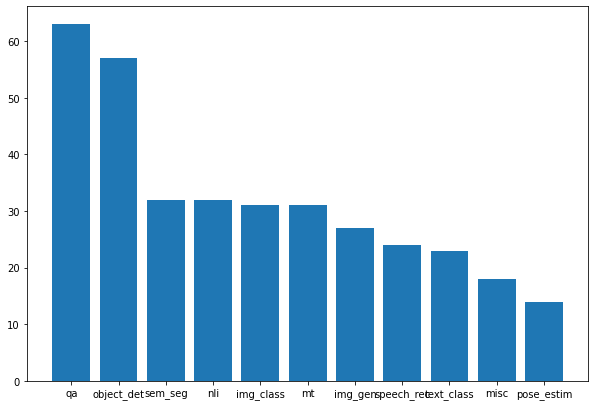

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1.3,1.3])
ax.bar(df.fold_class, df.counts)
plt.show()

In [ ]:
segmented_tables_annotations.tables[15][1]

{'ablation': False,
 'dataset_text': 'Hub5 Eval2000, Switchboard, CallHome',
 'index': 1,
 'leaderboard': True,
 'records': [],
 'segmentation': [['table-meta', 'dataset-sub', 'dataset-sub', 'dataset'],
  ['model-competing', '', '', ''],
  ['model-paper', '', '', ''],
  ['model-paper', '', '', ''],
  ['model-paper', '', '', ''],
  ['model-paper', '', '', ''],
  ['model-paper', '', '', ''],
  ['model-paper', '', '', ''],
  ['model-paper', '', '', ''],
  ['model-paper', '', '', '']]}

In [ ]:
segmented_tables_annotations_with_records = segmented_tables_annotations[segmented_tables_annotations['tables'][]]

SyntaxError: ignored

In [ ]:
segmented_tables_annotations_with_records = segmented_tables_annotations.apply(lambda row: sum([len(t['records']) for t in row['tables']]))

KeyError: ignored

In [ ]:
pwc_leaderboards = read_tables_annotations(PWC_LEADERBOARDS_URL)

records = (pwc_leaderboards.tables.apply(
    lambda tables: sum([len(t['records']) for t in tables])
).sum())

print(f'Number of papers: {len(pwc_leaderboards):8}')
print(f'Number of tables: {pwc_leaderboards.tables.apply(len).sum():8}')
print(f'Linked results:   {records:8}')

Number of papers:      731
Number of tables:     1278
Linked results:       5393


In [ ]:
pwc_leaderboards.head(1)

,arxiv_id,tables
0,1207.4708v2,"[{'index': 5, 'records': [{'task': 'Atari Game..."


In [ ]:
a = (pwc_leaderboards.tables.apply(
    lambda tables: len([print(t) for t in tables if t['records']])
).sum())

{'index': 5, 'records': [{'task': 'Atari Games', 'dataset': 'Atari 2600 Asterix', 'metric': 'Score', 'model': 'Best Learner', 'value': '987.3', 'row': 1, 'column': 3}, {'task': 'Atari Games', 'dataset': 'Atari 2600 Beam Rider', 'metric': 'Score', 'model': 'Best Learner', 'value': '929.4', 'row': 2, 'column': 3}, {'task': 'Atari Games', 'dataset': 'Atari 2600 Freeway', 'metric': 'Score', 'model': 'Best Learner', 'value': '19.1', 'row': 3, 'column': 3}, {'task': 'Atari Games', 'dataset': 'Atari 2600 Seaquest', 'metric': 'Score', 'model': 'Best Learner', 'value': '664.8', 'row': 4, 'column': 3}, {'task': 'Atari Games', 'dataset': 'Atari 2600 Space Invaders', 'metric': 'Score', 'model': 'Best Learner', 'value': '250.1', 'row': 5, 'column': 3}, {'task': 'Atari Games', 'dataset': 'Atari 2600 Alien', 'metric': 'Score', 'model': 'Best Learner', 'value': '939.2', 'row': 6, 'column': 3}, {'task': 'Atari Games', 'dataset': 'Atari 2600 Amidar', 'metric': 'Score', 'model': 'Best Learner', 'value': 

In [ ]:
a

1278

In [ ]:
pd.set_option('display.max_colwidth', 100)
pwc_leaderboards.head(20)

,arxiv_id,tables
0,1207.4708v2,"[{'index': 5, 'records': [{'task': 'Atari Games', 'dataset': 'Atari 2600 Asterix', 'metric': 'Sc..."
1,1208.5092v1,"[{'index': 0, 'records': [{'task': 'Image Clustering', 'dataset': 'Coil-20', 'metric': 'NMI', 'm..."
2,1312.5602v1,"[{'index': 0, 'records': [{'task': 'Atari Games', 'dataset': 'Atari 2600 Beam Rider', 'metric': ..."
3,1312.6173v4,"[{'index': 0, 'records': [{'task': 'Cross-Lingual Document Classification', 'dataset': 'Reuters ..."
4,1404.4641v1,"[{'index': 0, 'records': [{'task': 'Cross-Lingual Document Classification', 'dataset': 'Reuters ..."
5,1406.2199v2,"[{'index': 4, 'records': [{'task': 'Action Classification', 'dataset': 'HMDB51', 'metric': 'Accu..."
6,1410.2455v3,"[{'index': 0, 'records': [{'task': 'Document Classification', 'dataset': 'Reuters En-De', 'metri..."
7,1411.0589v3,"[{'index': 2, 'records': [{'task': 'Microarray Classification', 'dataset': 'ArrayCGH', 'metric':..."
8,1412.6334v4,"[{'index': 1, 'records': [{'task': 'Cross-Lingual Document Classification', 'dataset': 'Reuters ..."
9,1502.00873v1,"[{'index': 0, 'records': [{'task': 'Face Verification', 'dataset': 'Labeled Faces in the Wild', ..."


In [ ]:
pd.set_option('display.max_colwidth', None)
segmented_tables_annotations.loc[segmented_tables_annotations.arxiv_id == '1404.4641v1']

,arxiv_id,fold,sha256,tables


In [ ]:
arxiv_papers.loc[arxiv_papers.arxiv_id == '1404.4641v1']

,arxiv_id,archive_size,sha256,title,sections,tables,status
6442,1404.4641v1,140411,8d9b5f9b84e177f8e35cfd491a75ed19a1214f9881e3d9430f15d61dfb540906,Multilingual Models for Compositional Distributed Semantics,16,4,success


In [ ]:
pwc_leaderboards.loc[pwc_leaderboards.arxiv_id == '1404.4641v1']

,arxiv_id,tables
4,1404.4641v1,"[{'index': 0, 'records': [{'task': 'Cross-Lingual Document Classification', 'dataset': 'Reuters RCV1/RCV2 English-to-German', 'metric': 'Accuracy', 'model': 'Bi+', 'value': '88.1', 'row': 14, 'column': 1}, {'task': 'Cross-Lingual Document Classification', 'dataset': 'Reuters RCV1/RCV2 German-to-English', 'metric': 'Accuracy', 'model': 'Bi+', 'value': '79.2', 'row': 14, 'column': 2}]}]"


In [ ]:
pwc_leaderboards['tables'][0]

[{'index': 5,
  'records': [{'column': 3,
    'dataset': 'Atari 2600 Asterix',
    'metric': 'Score',
    'model': 'Best Learner',
    'row': 1,
    'task': 'Atari Games',
    'value': '987.3'},
   {'column': 3,
    'dataset': 'Atari 2600 Beam Rider',
    'metric': 'Score',
    'model': 'Best Learner',
    'row': 2,
    'task': 'Atari Games',
    'value': '929.4'},
   {'column': 3,
    'dataset': 'Atari 2600 Freeway',
    'metric': 'Score',
    'model': 'Best Learner',
    'row': 3,
    'task': 'Atari Games',
    'value': '19.1'},
   {'column': 3,
    'dataset': 'Atari 2600 Seaquest',
    'metric': 'Score',
    'model': 'Best Learner',
    'row': 4,
    'task': 'Atari Games',
    'value': '664.8'},
   {'column': 3,
    'dataset': 'Atari 2600 Space Invaders',
    'metric': 'Score',
    'model': 'Best Learner',
    'row': 5,
    'task': 'Atari Games',
    'value': '250.1'},
   {'column': 3,
    'dataset': 'Atari 2600 Alien',
    'metric': 'Score',
    'model': 'Best Learner',
    'row': 

In [ ]:
pwc_leaderboards['tables'][100]

[{'index': 2,
  'records': [{'column': 9,
    'dataset': 'WOS-5736',
    'metric': 'Accuracy',
    'model': 'HDLTex',
    'row': 18,
    'task': 'Document Classification',
    'value': '90.93'},
   {'column': 3,
    'dataset': 'WOS-11967',
    'metric': 'Accuracy',
    'model': 'HDLTex',
    'row': 22,
    'task': 'Document Classification',
    'value': '86.07'},
   {'column': 6,
    'dataset': 'WOS-46985',
    'metric': 'Accuracy',
    'model': 'HDLTex',
    'row': 26,
    'task': 'Document Classification',
    'value': '76.58'}]}]